In [3]:
from generadoresAleatorios import generador_congruencial_lineal as gcl
from generadoresAleatorios import Fibonacci as gdf
import numpy as np
import matplotlib.pyplot as plt


In [4]:
n = 6
nums1 = gcl(6, 9, 13, n)
nums2 = gcl(1230, 1201, 10001, n)
nums3 = gdf(1, 1, 10001, n, x0=4, x1=9, mu=1, nu=2)

print('---Ejercicio 1-a, a=9, b=1, M=1103')
print(f'{nums1}\n')
print('---Ejercicio 1-b, a=1230, b=1201, M=10001')
print(f'{nums2}\n') 
print('---Ejercicio 1-c, a=1, b=1, mu=1, nu=2, M=8')
print(f'{nums3}\n')

---Ejercicio 1-a, a=9, b=1, M=1103
[0.15384615 0.61538462 0.38461538 0.         0.69230769 0.84615385]

---Ejercicio 1-b, a=1230, b=1201, M=10001
[0.24307569 0.10318968 0.04339566 0.49675032 0.1229877  0.3949605 ]

---Ejercicio 1-c, a=1, b=1, mu=1, nu=2, M=8
[0.00129987 0.00219978 0.00349965 0.00569943 0.00919908 0.01489851]



# Histograma con $10^6$ números.

In [5]:
n = int(10E6)
a1 = gcl(9,1,1103,n)
a2 = gcl(1230,1201,10001,n)

In [6]:
afibo = gdf(1, 1, 10001, n, x0=4, x1=9, mu=1, nu=2)

In [7]:
# También los generamos con numpy
numpy1 = np.random.rand(n)

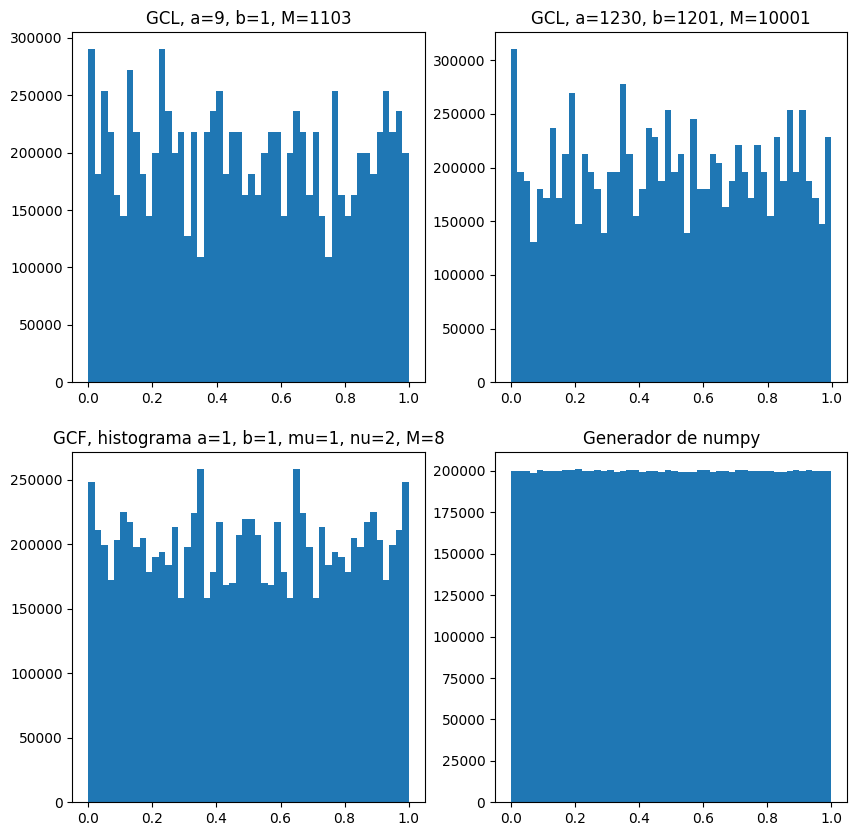

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(a1, bins=50)
plt.title('GCL, a=9, b=1, M=1103')

plt.subplot(2,2,2)
plt.hist(a2,bins=50)
plt.title('GCL, a=1230, b=1201, M=10001')

plt.subplot(2,2,3)
plt.hist(afibo, bins=50)
plt.title('GCF, histograma a=1, b=1, mu=1, nu=2, M=8')

plt.subplot(2,2,4)
plt.hist(numpy1, bins=50)
plt.title('Generador de numpy')
plt.show()

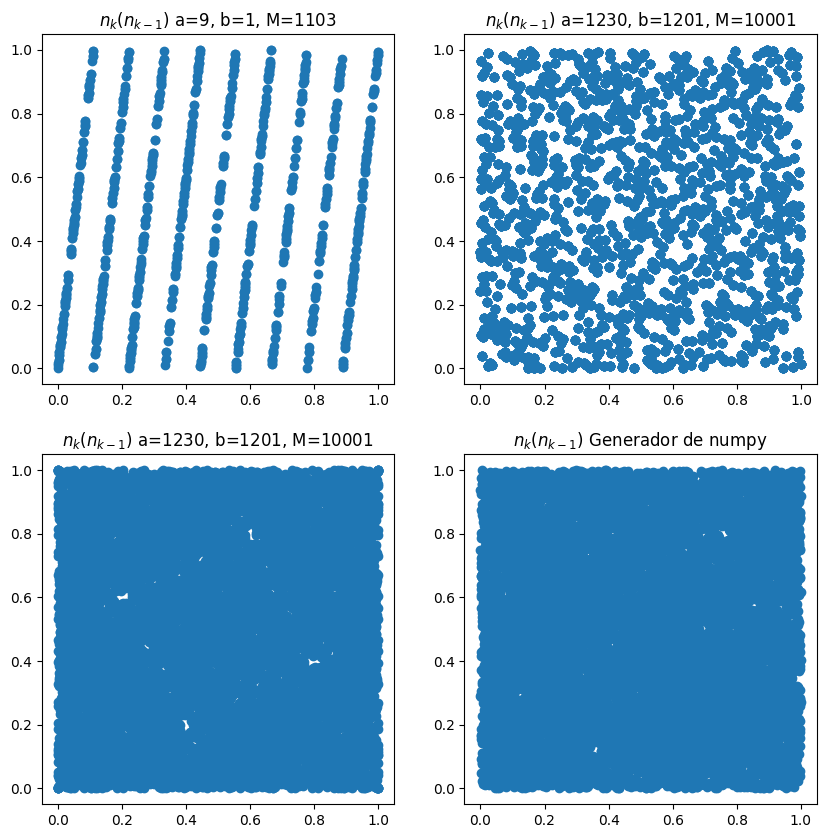

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(a1[:1000],a1[1:1001])
plt.title('$n_k(n_{k-1})$ a=9, b=1, M=1103')

plt.subplot(2,2,2)
plt.scatter(a2[0:10000],a2[1:10001])
plt.title('$n_k(n_{k-1})$ a=1230, b=1201, M=10001')

plt.subplot(2,2,3)
plt.scatter(afibo[0:10000],afibo[1:10001])
plt.title('$n_k(n_{k-1})$ a=1230, b=1201, M=10001')

plt.subplot(2,2,4)
plt.scatter(numpy1[0:10000],numpy1[1:10001])
plt.title('$n_k(n_{k-1})$ Generador de numpy')
plt.show()

 Concluimos que los parámetros usados en el apartado b son más óptimos para obtener números aleatorios dado que tienen menor periodicidad la serie.

C:\Users\Francisco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


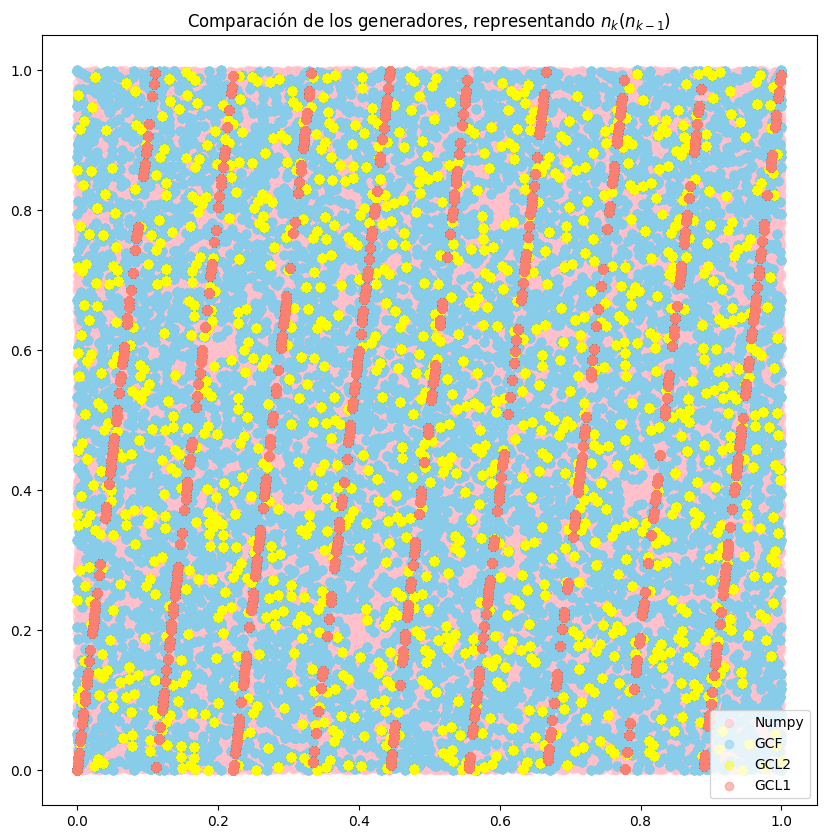

In [10]:
# Ahora vamos a representar en una misma gráfica los 3 generadores y también el de python
plt.figure(figsize=(10,10))
plt.scatter(numpy1[0:100000],numpy1[1:100001], color='pink', alpha=0.5, label='Numpy')

plt.scatter(afibo[0:100000],afibo[1:100001], color='skyblue', alpha=0.5, label='GCF')

plt.scatter(a2[0:100000],a2[1:100001], color='yellow', alpha=0.5, label='GCL2')

plt.scatter(a1[:100000],a1[1:100001], color='salmon', alpha=0.5, label='GCL1')

plt.title('Comparación de los generadores, representando $n_k(n_{k-1})$')
plt.legend()
plt.show()

# Vamos a generar números con una distribución exponencial.

In [11]:
# Sacamos la inversa de la exponencial:
def inversa_exponencial(u, lamb):
    return -np.log(u)/lamb



In [12]:
# Usamos los números del generador de fibonacci
# para generar una muestra de tamaño 1000
# de una distribución exponencial con lambda=1
# y una normal con mu=0, sigma=1

# Exponencial
exponencial = inversa_exponencial(afibo, 3)
# Normal


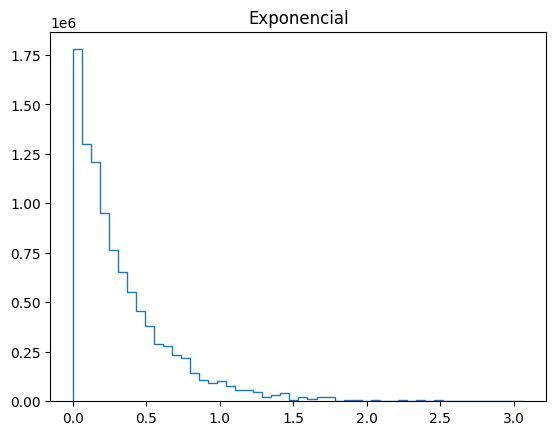

In [13]:
# Hacemos histogramas de las muestras
plt.hist(exponencial, bins=50, histtype='step')
plt.title('Exponencial')
plt.show()



# Utilizando el método de aceptación rechazo.

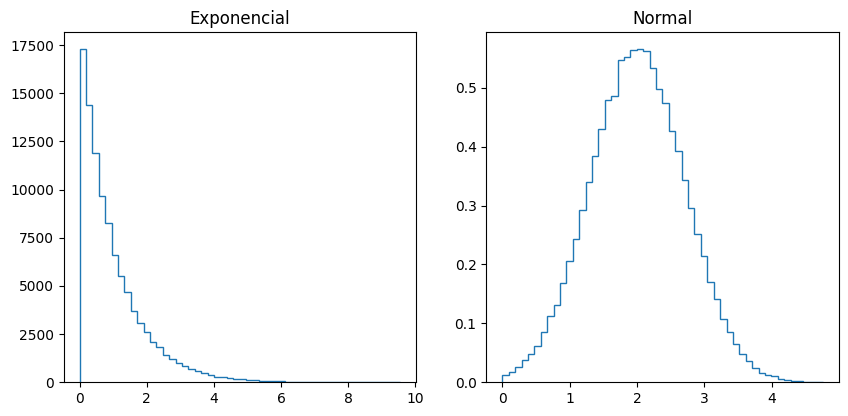

In [14]:
def aceptacion_rechazo(f,n, rango=1):
    ''' 
    Método de aceptación y rechazo
    f: función de densidad de probabilidad
    n: número de muestras
    rango: la variable aleatoria irá entre 0 y este número
    '''
    x, y = np.random.random(n)*rango, np.random.random(n)
    return x[y<f(x)]


def exponencial(x):
    return np.exp(-x)

def normal(x):
    # Recuerda que tiene que estar normalizada, porque si no, no es una densidad de probabilidad
    # Y el método de aceptación y rechazo no funcionará (se saturará aceptando todo donde la función es mayor que 1)
    return np.exp(-(x-2)**2)/np.sqrt(2*np.pi)

# Exponencial
exponencial = aceptacion_rechazo(exponencial, 1000000, 10)
# Normal
normal = aceptacion_rechazo(normal, 1000000, 5)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(exponencial, bins=50, histtype='step')
plt.title('Exponencial')

plt.subplot(2,2,2)
plt.hist(normal, bins=50, histtype='step', density=True)
plt.title('Normal')

plt.show()